< Project 1. KIC MACH PROJECT >
============================

- 공모전 링크 : <https://dacon.io/competitions/official/235647/overview/>

# 1. Question or problem definition & Domain Research

## 1.1 Problem Definiton
### 1.1.1 Purpose
- 심리학 테스트 분석 알고리즘 개발
- 마키아벨리즘 심리테스트를 활용하여 테스트 참가자의 국가 선거 투표 여부 예측

## 1.2 Data
### 1.2.1 Dictionary

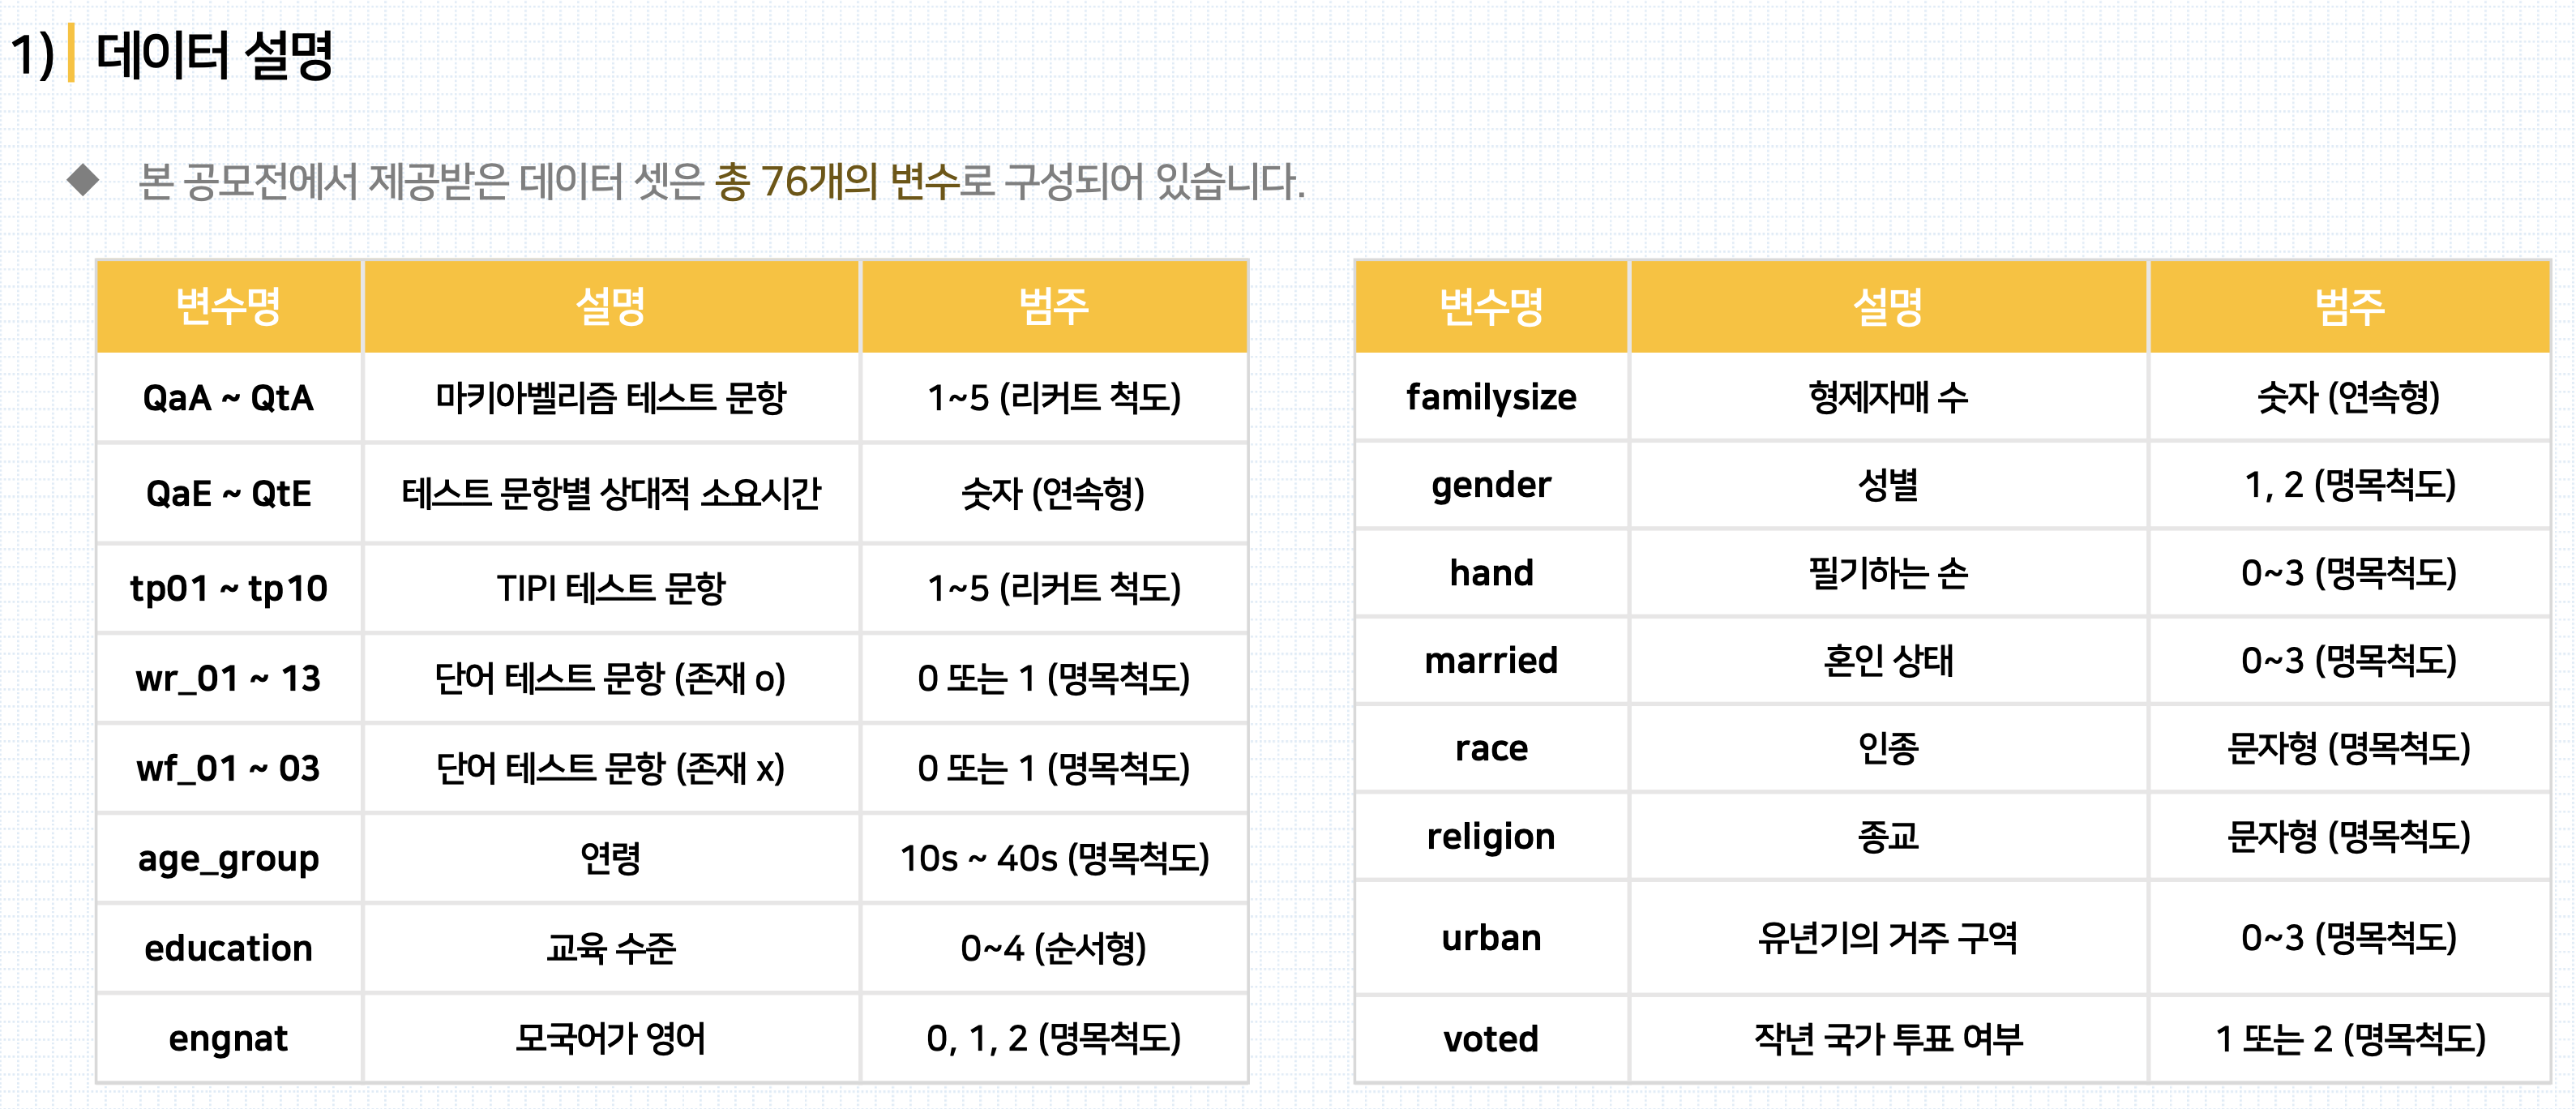

# 2. Acquire training and testig data : Data Loading

## 2.1 Package Loading

## 2.2 Data Loading

In [1]:
# Directory Set
import os
os.getcwd()
os.chdir('/Users/harryjeong/DA/DA_Project/KIC_Project')
os.getcwd()

'/Users/harryjeong/DA/DA_Project/KIC_Project'

In [2]:
import pandas as pd
train = pd.read_csv('Data/maki_train.csv')
test = pd.read_csv('Data/maki_test_x.csv')
combine = [train, test]
submission = pd.read_csv('Data/sample_submission.csv')

# 3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)

## 3.1 Analyze by describing data (Quick-view)

### 3.1.1 Check columns (name)

In [3]:
train.columns.values

array(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE',
       'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA',
       'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE',
       'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA',
       'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education',
       'engnat', 'familysize', 'gender', 'hand', 'married', 'race',
       'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07',
       'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype=object)

### 3.1.2 Check feature type
1) Catagorical
- Categorical: engnat, gender, hand, married, race, race, religion, W_Ques, urban, education, voted
- Ordinal: Q_Ques, TP_Ques, age_group

2) Numerical
- Continous: Q_Time
- Discrete: familysize

In [4]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


### 3.1.3 Check errors or typos

In [5]:
train.tail()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1
45531,45531,3.0,496,5.0,1827,5.0,754,3.0,1117,1.0,...,1,1,0,1,1,0,1,0,1,1


### 3.1.4 Check blank, null or empty values & data types
- integer or floats or strings (object)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

### 3.1.5 Check distribution of numerical feature values
1) Q_Whole에서는 특별한 부분 안 보임
- Q_Time 분포 체크 -> 대부분 같은 범위에 있는 것으로 보이나 H, I가 다소 높은 수치 보여줌 (약 2배)

2) W_Ques
- wf 즉, 존재하지 않는 단어의 평균이 현저히 낮은 것으로 나옴 -> 존재하지 않는 단어라는 것을 대부분 안다는 의미
- wr_11, wr_06, wr_03, wr_09는 상대적으로 어려운 단어로 보임

### feature grouping based on its origin

In [8]:
# Q_Whole : Q 변수 전체
Q_Whole = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
		       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE',
		       'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA',
		       'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE',
		       'QsA', 'QsE', 'QtA', 'QtE']
# Q_Ques : Q 변수 중 질문만
Q_Ques = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
           'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
           'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
# Q_Time : Q 변수 중 소요시간만
Q_Time = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QkE',
          'QjE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

# W_Ques
W_Ques = ['wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
wf_Ques = ['wf_01', 'wf_02', 'wf_03']
wr_Ques = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

# human : 인구통계학적 컬럼
human = ['education', 'engnat', 'familysize', 'hand', 'married', 'urban',
         'gender', 'age_group', 'race', 'religion']

In [9]:
train[Q_Ques].describe()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,2.904463,3.662347,1.749078,2.317952,2.168145,2.560595,2.317952,3.157691,3.575529,3.813933,4.325727,3.509620,2.632896,3.217232,3.071752,2.840464,2.823487,3.432948,3.225687
std,1.196952,1.566142,1.431494,1.043625,1.369205,1.348653,1.510600,1.460813,1.481740,1.361220,1.372551,1.146992,1.375134,1.473022,1.476414,1.489744,1.404342,1.424383,1.374938,1.521603
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Q_Time 분포 체크 -> 대부분 같은 범위에 있는 것으로 보이나 H, I가 다소 높은 수치 보여줌 (약 2배)
train[Q_Time].describe().T.drop(['max', 'std', 'count', 'min'], axis = 1)

,mean,25%,50%,75%
QaE,945.357046,404.0,557.0,827.0
QbE,2189.588575,875.0,1218.0,1838.0
QcE,1484.294518,651.0,899.0,1335.0
QdE,1490.672231,679.0,931.0,1355.0
QeE,1899.292278,834.0,1154.0,1656.0
QfE,1850.650268,504.0,712.0,1078.0
QgE,1284.607946,549.0,772.0,1150.0
QhE,4584.272138,1077.0,1464.0,2090.0
QiE,4068.433827,1259.0,1800.0,2761.0
QkE,2038.985790,859.0,1178.0,1721.0


In [11]:
# wf 즉, 존재하지 않는 단어의 평균이 현저히 낮은 것으로 나옴 -> 존재하지 않는 단어라는 것을 대부분 안다는 의미
# wr_11, wr_06, wr_03, wr_09는 상대적으로 어려운 단어로 보임
train[W_Ques].describe().loc['mean', :].sort_values(ascending = False)

wr_08    0.972195
wr_12    0.947729
wr_10    0.946104
wr_07    0.938900
wr_02    0.934793
wr_13    0.927040
wr_05    0.895722
wr_04    0.868708
wr_01    0.709721
wr_11    0.395195
wr_06    0.328538
wr_03    0.208974
wr_09    0.202824
wf_02    0.163665
wf_03    0.118356
wf_01    0.079592
Name: mean, dtype: float64

In [12]:
train[human].describe()

,education,engnat,familysize,hand,married,urban
count,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000
mean,2.544474,1.271326,4.716689e+04,1.170715,1.387112,2.180401
std,0.941328,0.448436,1.006402e+07,0.468883,0.639987,0.762647
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000e+00,1.000000,1.000000,2.000000
50%,3.000000,1.000000,2.000000e+00,1.000000,1.000000,2.000000
75%,3.000000,2.000000,3.000000e+00,1.000000,2.000000,3.000000
max,4.000000,2.000000,2.147484e+09,3.000000,3.000000,3.000000


## 3.2 Data Wrangling

- ### Creating mach_score
  - basically mach_score is sum of 20 questions.
  - However, in this data set, there are secret questions and some need to be reversed in order to make the total score.
  - Therefore, we decided to draw heatmap and see whether it shows the questions need to be reversed.

- Heatmap with original data
  - No secret questions show that they have clear correlations.
  ex) QbA & QcA (same direction) : positive correlations vs QbA  & QeA (opposite direction) : negative one

<AxesSubplot:>

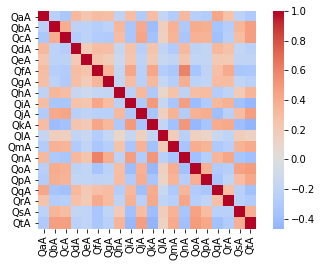

In [13]:
import seaborn as sns
correlations = train[Q_Ques].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

- Heatmap with reversing those known negative data
  - As you see on the heatmap below clearer correlations are seen.
  - And by that we can predict which questions are negative or positive.

In [14]:
for col in train[Q_Ques]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [15]:
# 음의 방향인 질문들을 한 방향으로 바꿔주기
for data in combine :
    flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
    for flip in flipping_columns: 
        data[flip] = 6 - data[flip]

<AxesSubplot:>

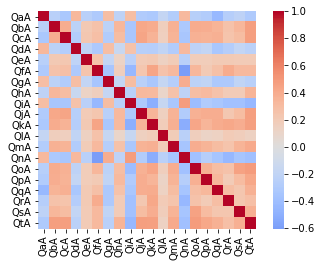

In [16]:
correlations = train[Q_Ques].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

- Heatmap with reversing those which unknown negative data.
  - finally, we found our data fully correlated to one direction.

In [17]:
for data in combine :
    flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
    for flip in flipping_secret_columns: 
        data[flip] = 6 - data[flip]

<AxesSubplot:>

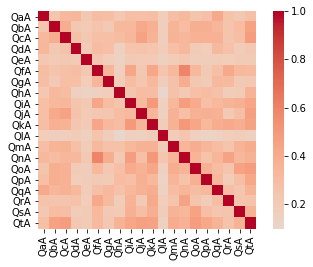

In [18]:
correlations = data[Q_Ques].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

- Creating mach_score column.

In [19]:
# 컬럼에 추가    
for data in combine :
    data['mach_score'] = data[Q_Ques].sum(axis = 1)
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,mach_score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,...,1,0,1,1,0,1,0,1,1,59.0
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,...,1,0,1,1,0,1,0,1,1,52.0
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,...,1,0,1,1,1,1,0,1,1,38.0
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,...,0,0,0,1,0,1,0,1,1,67.0
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,...,1,1,1,1,0,1,1,1,1,60.0


In [20]:
data[['mach_score']].describe()

,mach_score
count,11383.000000
mean,67.199596
std,15.822510
min,20.000000
25%,55.000000
50%,68.000000
75%,80.000000
max,100.000000


- ### Creating tp_score
  - TP has its own way to create its total score and we did it.

In [21]:
# TP_score 계산 후 5개 성향으로 그룹화
# 원본 데이터 구성
# 0: 완전 동의 1:약간 동의 ...~ 5: 약간 비동의 6: 완전 비동의 , 7: 무응답 

# 7에서 빼주면 
# 7: 완전 동의 6: 약간 동의 ....~2:약간 비동의 1: 완전 비동의   0: 무응답   

for data in combine : 
    TP_Ques = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
    data.loc[:,TP_Ques] = data.loc[:,TP_Ques].applymap(lambda x: 7 - x)
    
    # 짝수 질문은 reverse가 필요함 
    # 무응답 은 그대로 두고  나머지 8에서 빼줌
    # 짝수질문만 
    # 1: 완전동의 2: 약간 동의 ... ~6: 약간 비동의 7: 완전 동의    0: 무응답    
    TP_sel = ['tp02','tp04','tp06','tp08','tp10']
    data.loc[:,TP_sel] = data.loc[:,TP_sel].applymap(lambda x: 0 if x == 0 else 8 - x)

    # TIPI 계산
    data['sung']  = (data.tp03 + data.tp08)/2
    data['chin']= (data.tp07 + data.tp02)/2
    data['jung'] = (data.tp09 + data.tp04)/2
    data['kyung'] = (data.tp05 + data.tp10)/2
    data['why'] =(data.tp01 + data.tp06)/2
tp_score = ['sung', 'chin', 'jung', 'kyung', 'why']

## 3.3 Analyze by pivoting features
### Dependant variable vs each Explanatory variable
- To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.
- We can only do so at this stage for features which do not have any empty values.
It also makes sense doing so only for features which are categorical (human), ordinal (Q_Ques, TP_Ques, age_group) or discrete (familysize) type.

### Summary
- The voted rate is 0.45. (24898 voted, 20634 not voted out of 45532).
- education, age_group, married are strongly related to the voted rate. (classifying)
- engnat, gender, hand, race, religion, urban, familysize are not clearly related to the voted rate. (completing for familysize, creating)

In [22]:
# voted : 1, not voted : 2
a1 = sum(train['voted'] == 1) / len(train['voted'])
a2 = sum(train['voted'] == 1)
a3 = sum(train['voted'] == 2)
a4 = len(train['voted'])

print('The voted rate is %.2f. (%d voted, %d not voted out of %d)' \
% (a1, a2, a3, a4))

The voted rate is 0.45. (20634 voted, 24898 not voted out of 45532)


In [23]:
# By using 'mean' we can see the rate of voted and not voted.
# People with Higher education voted more. **
train[['education', 'voted']].groupby(['education'], as_index = False).mean().sort_values(by = 'voted')

,education,voted
4,4,1.380316
3,3,1.403494
0,0,1.522727
2,2,1.632967
1,1,1.950275


In [24]:
# not clear clue
train[['engnat', 'voted']].groupby(['engnat'], as_index = False).mean().sort_values(by = 'voted')

,engnat,voted
1,1,1.537397
2,2,1.571394
0,0,1.623377


In [25]:
# not clear clue
train[['gender', 'voted']].groupby(['gender'], as_index = False).mean().sort_values(by = 'voted')

,gender,voted
0,Female,1.539573
1,Male,1.553206


In [26]:
# The older, the more voted. **
train[['age_group', 'voted']].groupby(['age_group'], as_index = False).mean().sort_values(by = 'voted')

,age_group,voted
0,+70s,1.263830
6,60s,1.271357
5,50s,1.329872
4,40s,1.357949
3,30s,1.411179
2,20s,1.469671
1,10s,1.837214


In [27]:
# not clear clue
train[['hand', 'voted']].groupby(['hand'], as_index = False).mean().sort_values(by = 'voted')

,hand,voted
2,2,1.540494
1,1,1.545317
3,3,1.592844
0,0,1.633540


In [28]:
# People with currently married(2) & previously married(3) are more likely to have voted. **
train[['married', 'voted']].groupby(['married'], as_index = False).mean().sort_values(by = 'voted')

,married,voted
2,2,1.333433
3,3,1.422454
1,1,1.629572
0,0,1.677419


In [29]:
# White people are more likely to have voted, but not clearly related.
train[['race', 'voted']].groupby(['race'], as_index = False).mean().sort_values(by = 'voted')

,race,voted
6,White,1.495776
3,Indigenous Australian,1.547170
4,Native American,1.587591
2,Black,1.597786
5,Other,1.622402
1,Asian,1.704565
0,Arab,1.709402


In [30]:
# not clear clue
train[['religion', 'voted']].groupby(['religion'], as_index = False).mean().sort_values(by = 'voted')

,religion,voted
6,Christian_Protestant,1.434667
8,Jewish,1.449692
3,Christian_Catholic,1.526512
5,Christian_Other,1.539615
0,Agnostic,1.542602
1,Atheist,1.572704
10,Other,1.582809
7,Hindu,1.613016
4,Christian_Mormon,1.619159
2,Buddhist,1.621176


In [31]:
# not clear clue
train[['urban', 'voted']].groupby(['urban'], as_index = False).mean().sort_values(by = 'voted')

,urban,voted
0,0,1.490683
1,1,1.492872
2,2,1.541545
3,3,1.580402


In [32]:
# not clear clue
# found NA
train[['familysize', 'voted']].groupby(['familysize'], as_index = False).mean().sort_values(by = 'voted')

,familysize,voted
17,17,1.000000
24,100,1.000000
25,999,1.000000
21,30,1.000000
13,13,1.363636
15,15,1.375000
11,11,1.435897
14,14,1.444444
12,12,1.476190
7,7,1.480620


## 3.4 Analyze by visualizing data in 5 ways
>Confirming some of our assumptions using visualizations for analyzing the data.

### 3.4.0 Heatmap
>Check correlation btw human features
- (+) Relation : education & married, voted & married, voted & education
- (-) Relation : mach_score & married, mach_score & chin

<AxesSubplot:>

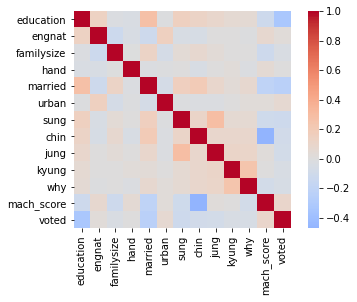

In [33]:
# (+) Relation : education & married, voted & married, voted & education, 
# (-) Relation : mach_score & married, mach_score & chin
import seaborn as sns
corr_fea = human + tp_score + ['mach_score'] + ['voted']
corr = train[corr_fea].corr(method = 'spearman')
sns.heatmap(corr, cmap = 'coolwarm', square = True, center = 0)

### 3.4.1 Correlating based on feature types
- mach_score
   - 56점 이상 높아지면 점점 not voted가 많아짐 => classifying
- tp_score : 큰 의미 없어보임
- age_group + mach_score
   - 10s are the most, but most did not vote and they tend to have high mach_score
   - 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
   - It seems high mach_score provoke low vote rate and the low is opposite.
- Married might divide into two groups at [0.0, 1.0], [2.0, )
- Education must be an important feature and is already well-grouped.

- ### mach & voted

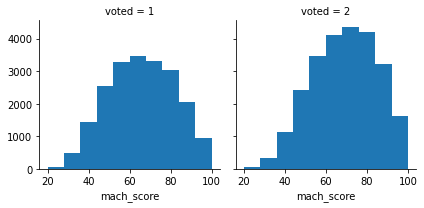

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(train, col = 'voted')
g.map(plt.hist, 'mach_score')

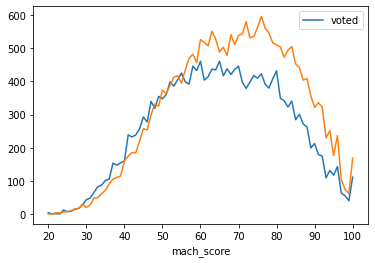

In [35]:
# mach_score가 50점 이상 높아지면 점점 not voted가 많아짐 => classifying
train[['mach_score', 'voted']][train['voted'] == 1].groupby('mach_score').count().plot()
plt.plot(train[['mach_score', 'voted']][train['voted'] == 2].groupby('mach_score').count())

In [36]:
# mach_score 56점 기준으로 not voted가 voted보다 많아지며 그 추세는 계속됨
# 그러나 변동폭이 있어서 그 차이가 일정하게 늘어나는 것은 아니라 classifying하기 쉽지 않음
v1 = train[['mach_score', 'voted']][train['voted'] == 2].groupby('mach_score').count() - train[['mach_score', 'voted']][train['voted'] == 1].groupby('mach_score').count()
v1[v1.voted > 0].T

mach_score,22.0,23.0,26.0,29.0,48.0,50.0,51.0,53.0,54.0,56.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
voted,3,3,2,2,13,26,3,27,12,35,...,156,148,120,120,59,93,41,19,21,57


- ### tp_score & voted

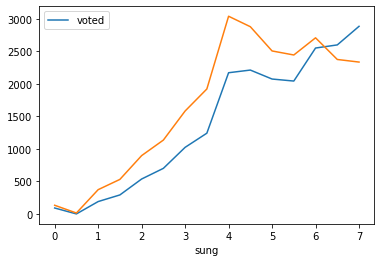

In [37]:
# 개별 : 점수가 높을수록 투표율/비투표율 높아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['sung', 'voted']][train['voted'] == 1].groupby('sung').count().plot()
plt.plot(train[['sung', 'voted']][train['voted'] == 2].groupby('sung').count())

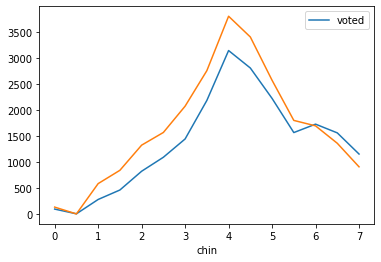

In [38]:
# 개별 : 4점까지 투표율/비투표율 높아지고 그 이후로 낮아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['chin', 'voted']][train['voted'] == 1].groupby('chin').count().plot()
plt.plot(train[['chin', 'voted']][train['voted'] == 2].groupby('chin').count())

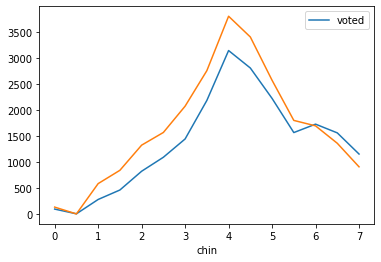

In [39]:
# 개별 : 4점까지 투표율/비투표율 높아지고 그 이후로 낮아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['chin', 'voted']][train['voted'] == 1].groupby('chin').count().plot()
plt.plot(train[['chin', 'voted']][train['voted'] == 2].groupby('chin').count())

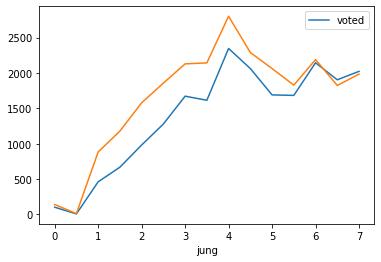

In [40]:
# 변별력 없음
train[['jung', 'voted']][train['voted'] == 1].groupby('jung').count().plot()
plt.plot(train[['jung', 'voted']][train['voted'] == 2].groupby('jung').count())

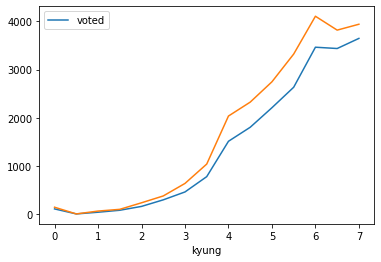

In [41]:
# 변별력 없음
train[['kyung', 'voted']][train['voted'] == 1].groupby('kyung').count().plot()
plt.plot(train[['kyung', 'voted']][train['voted'] == 2].groupby('kyung').count())

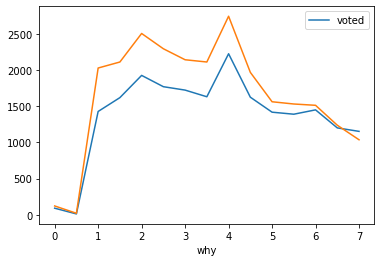

In [42]:
# 변별력 없음
train[['why', 'voted']][train['voted'] == 1].groupby('why').count().plot()
plt.plot(train[['why', 'voted']][train['voted'] == 2].groupby('why').count())

- ### age_group & mach & voted

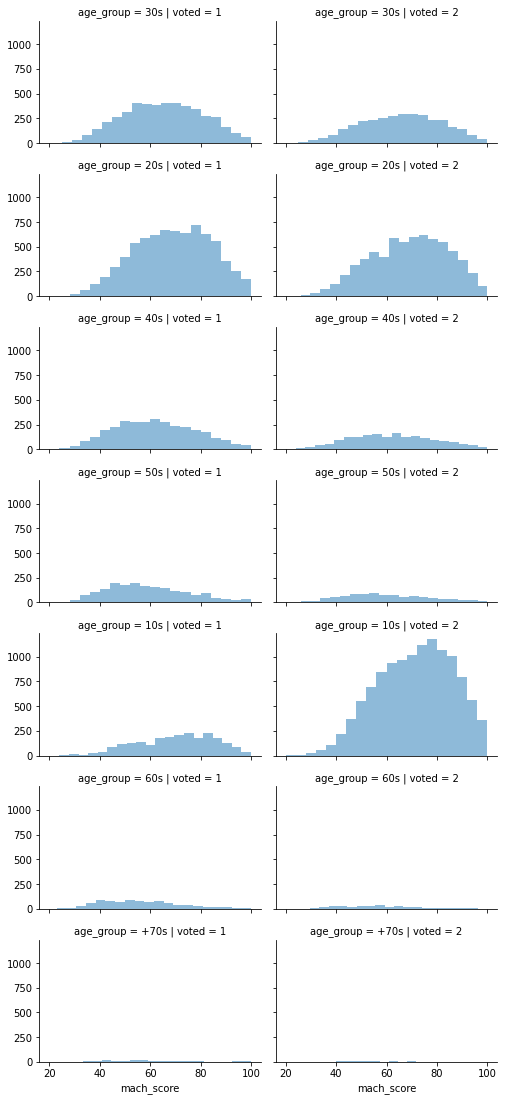

In [43]:
# 10s are the most, but most did not vote and they tend to have high mach_score
# 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
# It seems high mach_score provoke low vote rate and the low is opposite.
grid = sns.FacetGrid(train, col = 'voted', row = 'age_group', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'mach_score', alpha = .5, bins = 20)
grid.add_legend()

- ### education & voted

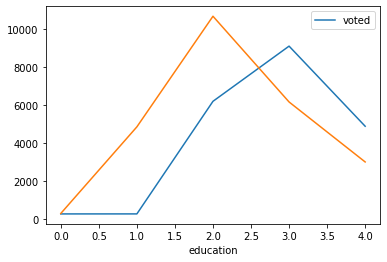

In [44]:
# Education is already well-grouped.
train[['education', 'voted']][train['voted'] == 1].groupby('education').count().plot()
plt.plot(train[['education', 'voted']][train['voted'] == 2].groupby('education').count())

- ### married & voted

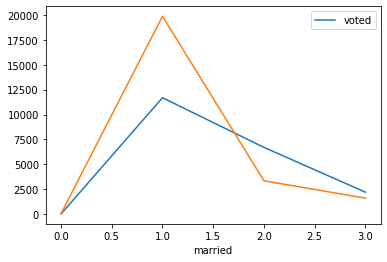

In [45]:
# Married might divide into two groups at [0.0, 1.0], [2.0, )
train[['married', 'voted']][train['voted'] == 1].groupby('married').count().plot()
plt.plot(train[['married', 'voted']][train['voted'] == 2].groupby('married').count())

## 3.5 Wrangle data
>We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### 3.5.1 Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.
- Based on our assumptions and decisions we want to drop **''**  features.
- Based on our assumptions and decisions we also want to drop **''**  features.

### 3.5.2 Creating new feature extracting from existing

### 3.5.3 Completing a numerical continuous feature (NA)
Now we should start estimating and completing features with missing or null values.   
ex) - familysize seems it has outlier -> but we already eliminated.
   
We can consider three methods to complete a numerical continuous feature.   
1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).
2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

### 3.5.4 Completing a categorical feature (NA)
- There is no NA.

### 3.5.5 Create new feature combining existing features

### 3.5.6 Converting categorical feature to numeric

In [46]:
train.columns.tolist()

['index',
 'QaA',
 'QaE',
 'QbA',
 'QbE',
 'QcA',
 'QcE',
 'QdA',
 'QdE',
 'QeA',
 'QeE',
 'QfA',
 'QfE',
 'QgA',
 'QgE',
 'QhA',
 'QhE',
 'QiA',
 'QiE',
 'QjA',
 'QjE',
 'QkA',
 'QkE',
 'QlA',
 'QlE',
 'QmA',
 'QmE',
 'QnA',
 'QnE',
 'QoA',
 'QoE',
 'QpA',
 'QpE',
 'QqA',
 'QqE',
 'QrA',
 'QrE',
 'QsA',
 'QsE',
 'QtA',
 'QtE',
 'age_group',
 'education',
 'engnat',
 'familysize',
 'gender',
 'hand',
 'married',
 'race',
 'religion',
 'tp01',
 'tp02',
 'tp03',
 'tp04',
 'tp05',
 'tp06',
 'tp07',
 'tp08',
 'tp09',
 'tp10',
 'urban',
 'voted',
 'wf_01',
 'wf_02',
 'wf_03',
 'wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09',
 'wr_10',
 'wr_11',
 'wr_12',
 'wr_13',
 'mach_score',
 'sung',
 'chin',
 'jung',
 'kyung',
 'why']

# 4. Modeling, Predict and Solve the problem

## 4.1 Listing possible models
- Randome Forest

## 4.2 Modeling by split train data
- data setting

In [47]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for data in combine :
    data['gender_code'] = label.fit_transform(data['gender'])
    data['age_group_code'] = label.fit_transform(data['age_group'])
    data['race_code'] = label.fit_transform(data['race'])
    data['religion_code'] = label.fit_transform(data['religion'])

# 라벨링한 변수들의 이전 형태는 제거
drop = ['gender','age_group','race','religion']
train = train.drop(drop, axis = 1)
test = test.drop(drop, axis = 1)

In [48]:
# test, train split
from sklearn.model_selection import train_test_split
Y_train = train['voted']
X_train = train.drop('voted', axis = 1)

train_x, test_x, train_y, test_y = train_test_split(X_train,              
                                                    Y_train,               
                                                    train_size = 0.7, 
                                                    random_state = 0)

In [49]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(31872, 83) (31872,) (13660, 83) (13660,)


In [50]:
print(Y_train.shape, X_train.shape, test.shape)

(45532,) (45532, 83) (11383, 83)


### 4.2.1 Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier as rf_c
m_rf = rf_c(random_state = 0)
m_rf.fit(train_x, train_y)
m_rf.score(test_x, test_y)

0.6923133235724743

## 4.3 Modeling by full data

In [52]:
from sklearn.ensemble import RandomForestClassifier as rf_c
m_rf = rf_c(random_state = 0)
m_rf.fit(X_train, Y_train)
Y_pred = m_rf.predict(test)
m_rf.score(X_train, Y_train)

1.0

In [53]:
submission = pd.read_csv('Data/sample_submission.csv')
submission['voted'] = Y_pred
submission.to_csv('sample_submission_20201222_01.csv', index = False)    # 0.6901224161